In [6]:
import wave
import struct
import numpy as np
import matplotlib.pyplot as plt
import math


In [7]:
input_file = wave.open('PBW1002.wav','r')
print(type(input_file))
parameters=input_file.getparams()
nchannel, sampwidth, framerate, nframes= parameters[0:4]
nframes_window20=int(framerate/50) #20ms -> 0.02초
frame_shift10=int(framerate/100) #10ms -> 0.01초

print("The number of channels: {0}".format(nchannel))
print("Samplewidth: {0}".format(sampwidth))
print("framerate: {0}".format(framerate))
print("The number of frames in each window size (20ms): {0}".format(nframes_window20))
print("Frameshift (10ms): {0}".format(frame_shift10))
print("Total number of frames:{0}".format(nframes))

<class 'wave.Wave_read'>
The number of channels: 1
Samplewidth: 2
framerate: 16000
The number of frames in each window size (20ms): 320
Frameshift (10ms): 160
Total number of frames:14080


In [8]:
def read_samples(wave_file, nframes):
    frame_data = wave_file.readframes(nframes)
    if frame_data:
        samples = len(frame_data) // sampwidth
        format = {1:"%db", 2:"<%dh", 4:"<%dl"}[sampwidth] % samples
        return struct.unpack(format, frame_data)
    else:
        return ()

read_samples(input_file,nframes)

(-16,
 -6,
 -9,
 11,
 -14,
 15,
 10,
 -7,
 4,
 6,
 8,
 2,
 -4,
 -18,
 -7,
 0,
 -1,
 2,
 11,
 13,
 -6,
 -7,
 4,
 0,
 3,
 8,
 -19,
 -6,
 -6,
 -9,
 -21,
 -4,
 -11,
 -4,
 -7,
 1,
 -1,
 17,
 4,
 -1,
 11,
 -8,
 9,
 7,
 0,
 4,
 -4,
 11,
 3,
 0,
 -5,
 -5,
 3,
 2,
 10,
 -4,
 2,
 -8,
 4,
 -12,
 1,
 1,
 -11,
 9,
 3,
 -2,
 -1,
 3,
 -3,
 9,
 -10,
 -9,
 1,
 3,
 -7,
 -4,
 -12,
 -5,
 -2,
 -3,
 -5,
 -4,
 -5,
 -13,
 -10,
 -7,
 -10,
 -10,
 -17,
 -4,
 -11,
 -8,
 0,
 -10,
 -6,
 4,
 13,
 -3,
 -2,
 -4,
 4,
 -11,
 -11,
 -4,
 -11,
 -15,
 -19,
 -24,
 -6,
 -17,
 -13,
 -3,
 -4,
 -19,
 -4,
 -2,
 -6,
 -3,
 -21,
 95,
 450,
 444,
 5,
 -460,
 -508,
 -95,
 86,
 8,
 -109,
 54,
 364,
 383,
 73,
 -182,
 -190,
 -37,
 10,
 -121,
 -188,
 -61,
 162,
 198,
 115,
 -6,
 13,
 -2,
 -14,
 -90,
 -95,
 -18,
 84,
 92,
 26,
 -16,
 37,
 51,
 8,
 -44,
 -87,
 -36,
 -13,
 -19,
 -59,
 -50,
 -34,
 -1,
 -12,
 -39,
 -71,
 -56,
 -37,
 -28,
 -41,
 -42,
 -24,
 -15,
 -21,
 -17,
 -28,
 -31,
 -20,
 -16,
 -12,
 -11,
 8,
 15,
 13,
 17,
 17,
 18,
 26,


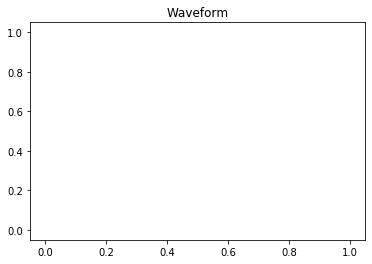

In [9]:
signal=input_file.readframes(-1)
signal=np.frombuffer(signal,dtype='int16')

'''
linspace() : 동일한 간격으로 떨어진 수를 만들어 내는 함수
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
'''

time=np.linspace(0, len(signal)/framerate, num=len(signal))
input_file.close()

plt.figure(1)
plt.title('Waveform')
plt.plot(time,signal)
plt.show()


In [10]:
output_file=wave.open('PBW1002_2.wav','w')

duration=0.88
frequency=160.0

output_file.setnchannels(nchannel)
output_file.setsampwidth(sampwidth)
output_file.setframerate(framerate)

for i in range(int(duration * framerate)):
    value = int(32767.0*math.cos(frequency*math.pi*float(i)/float(framerate)))
    data = struct.pack('<h', value)
    output_file.writeframesraw(data)

output_file.close()